In [1]:
import pandas as pd


In [2]:
online_store = pd.read_csv('online_retail_cleaned.csv')

In [3]:
print(online_store.head())
print(online_store.info())
print(online_store.describe())

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
2    536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
3    536390    85123A  WHITE HANGING HEART T-LIGHT HOLDER        64   
4    536394    85123A  WHITE HANGING HEART T-LIGHT HOLDER        32   

           InvoiceDate  UnitPrice  CustomerID         Country  ItemTotal  
0  2010-01-12 08:26:00       2.55     17850.0  United Kingdom       15.3  
1  2010-01-12 09:02:00       2.55     17850.0  United Kingdom       15.3  
2  2010-01-12 09:32:00       2.55     17850.0  United Kingdom       15.3  
3  2010-01-12 10:19:00       2.55     17511.0  United Kingdom      163.2  
4  2010-01-12 10:39:00       2.55     13408.0  United Kingdom       81.6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537966 entries, 0 to 537965
Data columns (total 9 columns):
 #   Column  

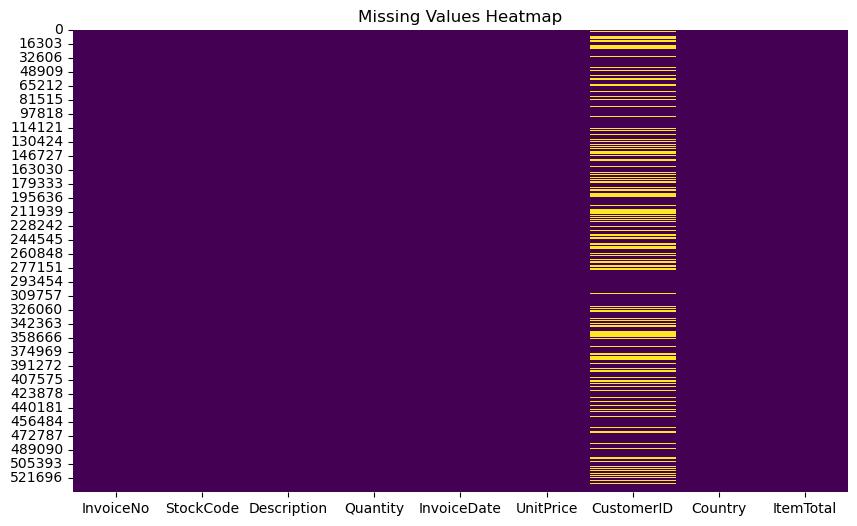

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(online_store.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [5]:
online_store.isna().count()

InvoiceNo      537966
StockCode      537966
Description    537966
Quantity       537966
InvoiceDate    537966
UnitPrice      537966
CustomerID     537966
Country        537966
ItemTotal      537966
dtype: int64

In [6]:
online_store.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.30
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.30
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.20
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...,...
537956,581134,23561,SET OF 6 RIBBONS PARTY,2,2011-07-12 13:12:00,2.89,16368.0,United Kingdom,5.78
537957,581175,23561,SET OF 6 RIBBONS PARTY,60,2011-07-12 15:16:00,2.49,14646.0,Netherlands,149.40
537958,581266,23561,SET OF 6 RIBBONS PARTY,12,2011-08-12 11:25:00,2.89,12621.0,Germany,34.68
537960,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-09-12 12:20:00,2.89,17581.0,United Kingdom,17.34


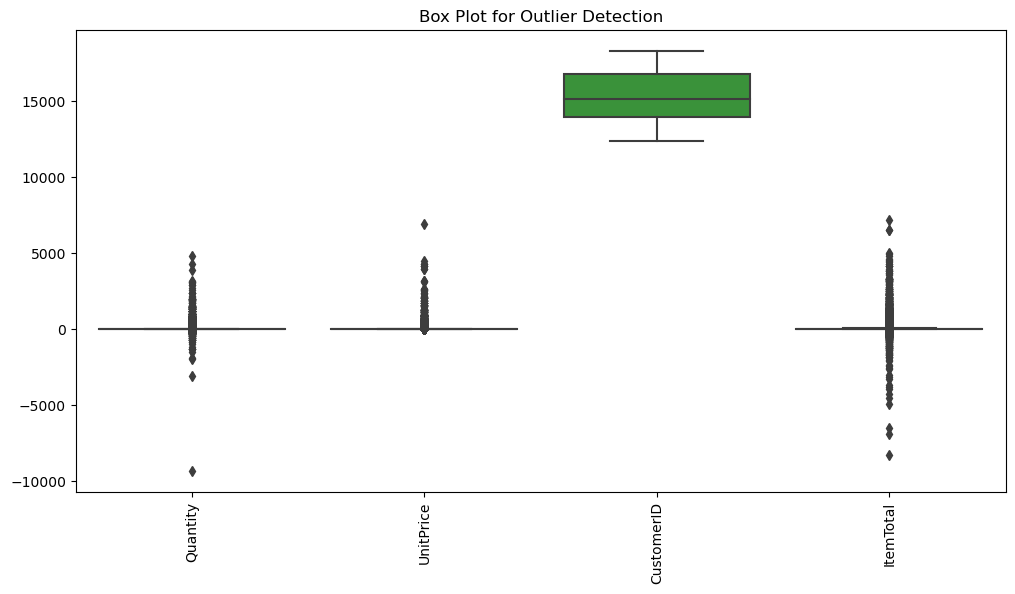

In [8]:
#Detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=online_store)
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=90)
plt.savefig("Box Plot for Outlier Detection.png", dpi= 200)
plt.show()


In [9]:
# Example: Remove outliers using the IQR method
Q1 = online_store.quantile(0.25)
Q3 = online_store.quantile(0.75)
IQR = Q3 - Q1
df = online_store[~((online_store < (Q1 - 1.5 * IQR)) | (online_store > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\ellar\AppData\Local\Temp\ipykernel_25552\2100644504.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = online_store.quantile(0.25)
C:\Users\ellar\AppData\Local\Temp\ipykernel_25552\2100644504.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = online_store.quantile(0.75)
C:\Users\ellar\AppData\Local\Temp\ipykernel_25552\2100644504.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = online_store[~((online_store < (Q1 - 1.5 * IQR)) | (online_stor

## Descriptive Statistics
summary statistics for numerical columns.

In [10]:
summary_stats = online_store.describe()
print(summary_stats)


            Quantity      UnitPrice     CustomerID      ItemTotal
count  537966.000000  537966.000000  405542.000000  537966.000000
mean        9.866505       4.006620   15294.913449      18.461239
std        40.741227      30.957236    1710.289816      74.552311
min     -9360.000000       0.001000   12347.000000   -8322.120000
25%         1.000000       1.250000   13969.000000       3.750000
50%         3.000000       2.080000   15159.000000       9.840000
75%        10.000000       4.130000   16794.000000      17.400000
max      4800.000000    6930.000000   18287.000000    7144.720000


In [12]:
online_store.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.30
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.30
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.20
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.60
5,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 10:51:00,2.55,17850.0,United Kingdom,15.30
6,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-01-12 11:21:00,2.95,15862.0,United Kingdom,11.80
7,536406,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-01-12 11:33:00,2.55,17850.0,United Kingdom,20.40
8,536502,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 12:36:00,2.95,16552.0,United Kingdom,17.70
9,536520,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-01-12 12:43:00,2.95,14729.0,United Kingdom,8.85


## Descriptive Statistics:
Sales Summary: Calculate total sales, average sales per transaction, and total quantity sold.

In [14]:
# Total Sales
total_sales = online_store['ItemTotal'].sum()
print(f"Total Sales: {total_sales}")

# Average Sales per Transaction
avg_sales = online_store['ItemTotal'].mean()
print(f"Average Sales per Transaction: {avg_sales}")

# Total Quantity Sold
total_quantity = online_store['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: 9931518.813000003
Average Sales per Transaction: 18.461238838513964
Total Quantity Sold: 5307844


## Sales Trend Analysis:
Time Series Analysis: Analyze monthly sales trends over time.

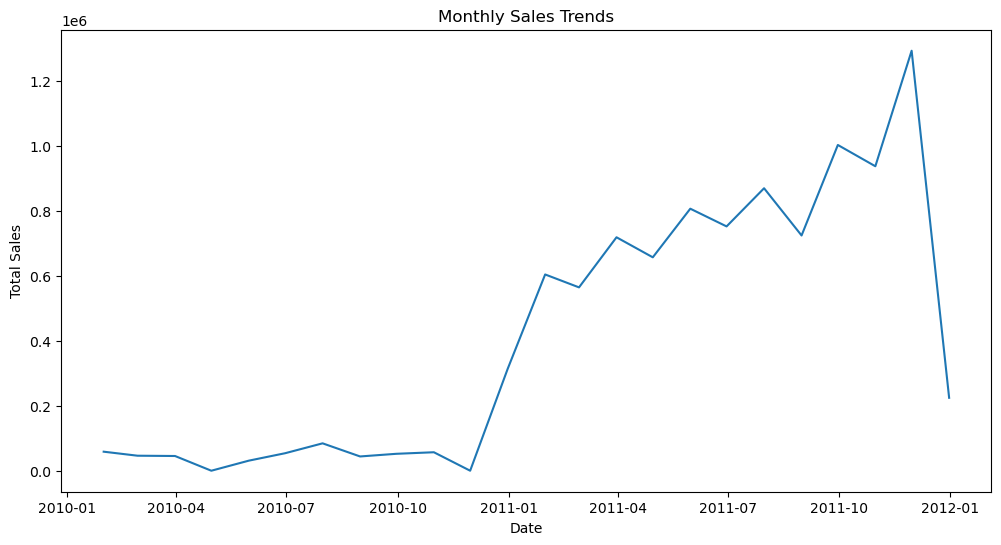

In [19]:
# Convert InvoiceDate to datetime
online_store['InvoiceDate'] = pd.to_datetime(online_store['InvoiceDate'])

# Group by month and year
monthly_sales = online_store.resample('M', on='InvoiceDate')['ItemTotal'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.savefig("Monthly Sales Trends.png", dpi= 200)
plt.show()


## Product Analysis:
Best-Selling Products: Identify the top 10 best-selling products by quantity sold.

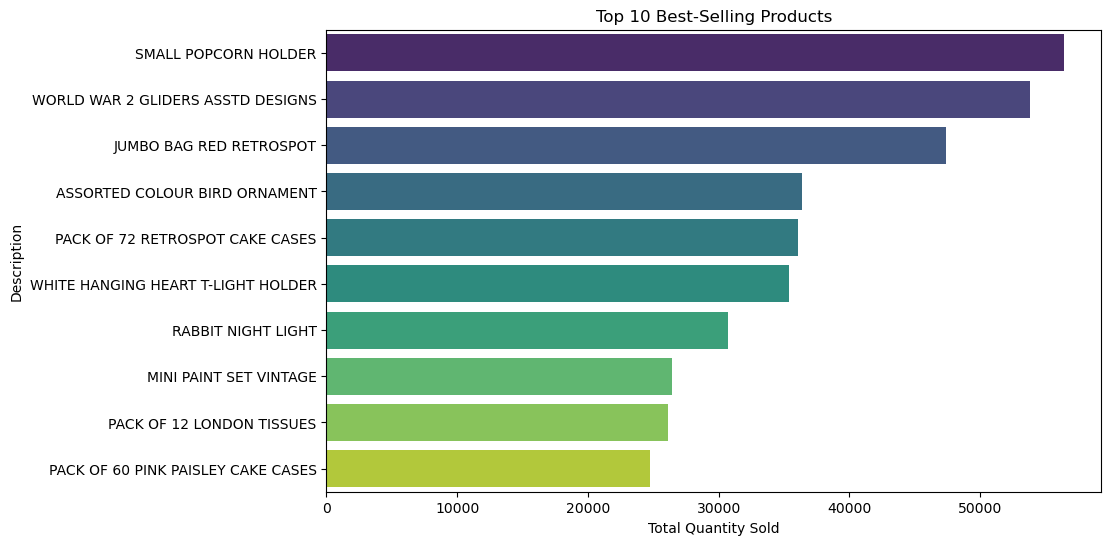

In [21]:
# Group by StockCode and sum Quantity
product_sales = online_store.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top 10 best-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Description')
plt.savefig("Top 10 Best-Selling Products.png", dpi= 200)
plt.show()


## Customer Analysis:
Customer Segmentation: Analyze the number of transactions by each customer.

In [25]:
# Group by CustomerID and count transactions
customer_transactions = online_store.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=False).head(5)
customer_transactions = customer_transactions.reset_index()
customer_transactions.columns = ['CustomerID', 'TransactionCount']
# Display summary statistics
customer_transactions.describe()


,CustomerID,TransactionCount
count,5.000000,5.000000
mean,14840.400000,5282.600000
std,1870.547861,1895.945753
min,12748.000000,2780.000000
25%,14096.000000,4639.000000
50%,14606.000000,5112.000000
75%,14911.000000,5899.000000
max,17841.000000,7983.000000


In [29]:
customer_transactions

,CustomerID,TransactionCount
0,17841.0,7983
1,14911.0,5899
2,14096.0,5112
3,12748.0,4639
4,14606.0,2780


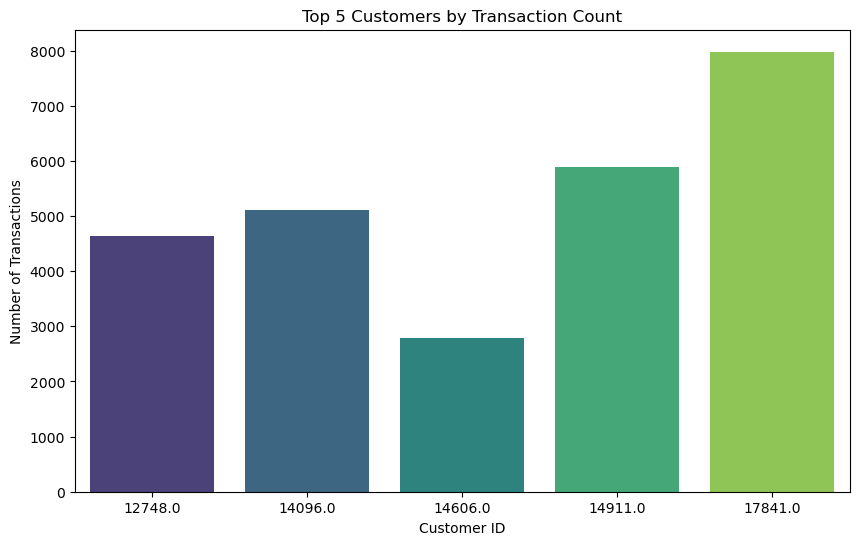

In [26]:
# Plotting the top 5 customers by transaction count
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='TransactionCount', data=customer_transactions, palette='viridis')
plt.title('Top 5 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.savefig("Top 5 Customers by Transaction Count.png", dpi=200)
plt.show()

In [30]:
#Lowest 5 customers
# Group by CustomerID and count transactions
lowest_5_customer_transactions = online_store.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending=True).head(5)
lowest_5_customer_transactions = lowest_5_customer_transactions.reset_index()
lowest_5_customer_transactions.columns = ['CustomerID', 'TransactionCount']
lowest_5_customer_transactions

,CustomerID,TransactionCount
0,15316.0,1
1,13270.0,1
2,17986.0,1
3,15524.0,1
4,16323.0,1


## Revenue Analysis:
Top Revenue Generators: Identify the top 10 products generating the most revenue.

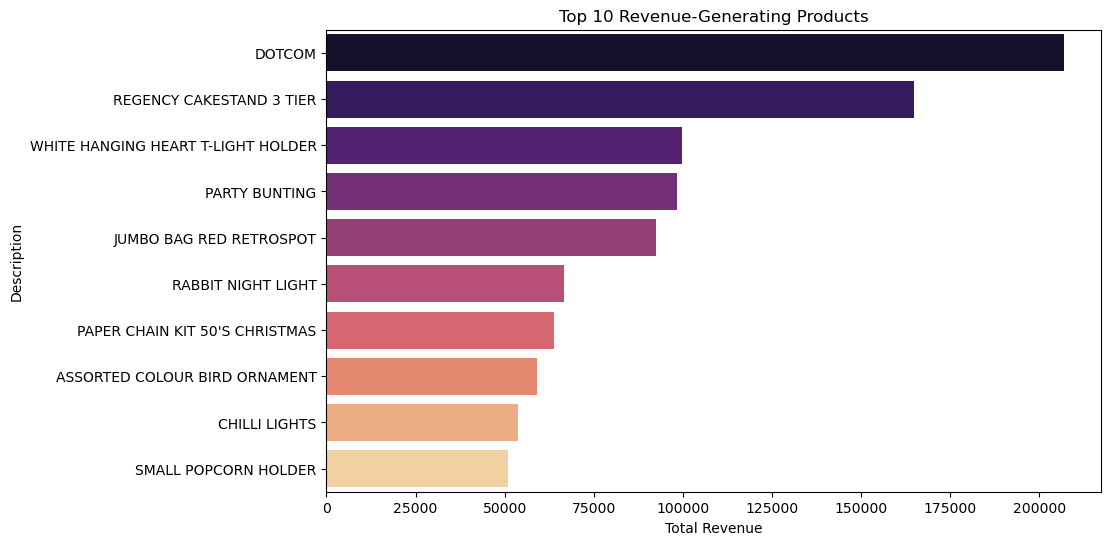

In [33]:
# Group by StockCode and sum ItemTotal
product_revenue = online_store.groupby('Description')['ItemTotal'].sum().sort_values(ascending=False).head(10)

# Plot top 10 revenue-generating products
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='magma')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Description')
plt.savefig("Top 10 Revenue-Generating Products.png", dpi= 200)
plt.show()


# Visualizations:

Bar Chart for Top 10 Best-Selling Products

Scatter Plot for Sales vs. Quantity

C:\Users\ellar\AppData\Local\Temp\ipykernel_25552\551055979.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Sales vs Quantity.png", dpi= 200)
C:\Users\ellar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


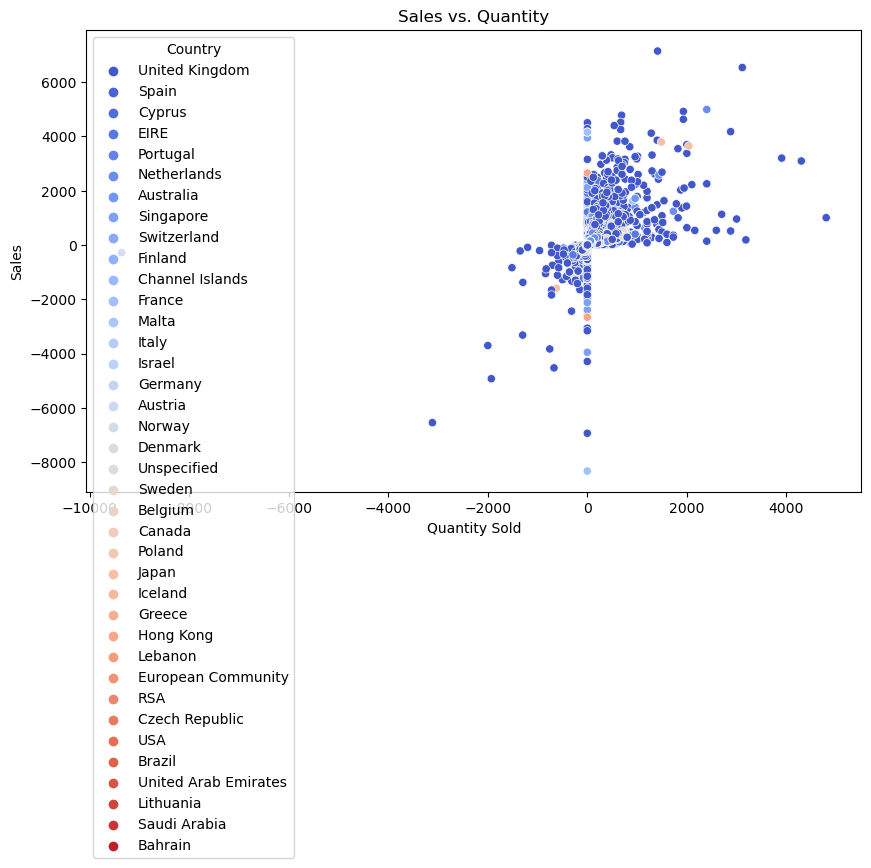

In [32]:
# Scatter plot for Sales vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='ItemTotal', data=online_store, hue='Country', palette='coolwarm')
plt.title('Sales vs. Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales')
plt.savefig("Sales vs Quantity.png", dpi= 200)
plt.show()
